In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_json('renttherunway_final_data.json.gz', lines=True)
dataset = dataset.dropna()

In [3]:
train_data, validation_data, test_data = np.split(dataset.sample(frac=1, random_state=42), 
                                                  [int(.7*len(dataset)), int(.85*len(dataset))])

In [4]:
dataset.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

fit      0.735977
small    0.134047
large    0.129976
Name: fit, dtype: float64

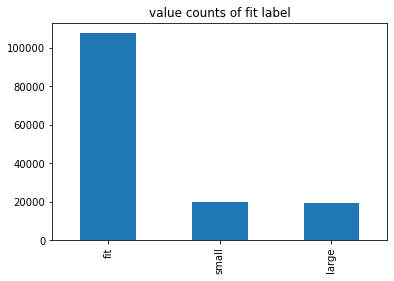

In [28]:
dataset['fit'].value_counts().plot(kind='bar',title='value counts of fit label')
plt.savefig("./plots/1.png")
dataset['fit'].value_counts()/sum(dataset['fit'].value_counts())

In [6]:
dataset['fit'].value_counts()

fit      107733
small     19622
large     19026
Name: fit, dtype: int64

In [7]:
bust_cat = dataset["bust size"].tolist()

len(set(bust_cat))

101

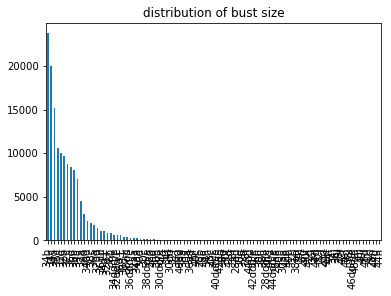

In [8]:
dataset['bust size'].value_counts().plot(kind='bar',title='distribution of bust size')

plt.savefig("./plots/2.png")

In [9]:
dataset['bust size'].value_counts()

34b    23754
34c    19984
34d    15222
36c    10605
32d     9999
       ...  
48d        1
42j        1
28h        1
44g        1
44h        1
Name: bust size, Length: 101, dtype: int64

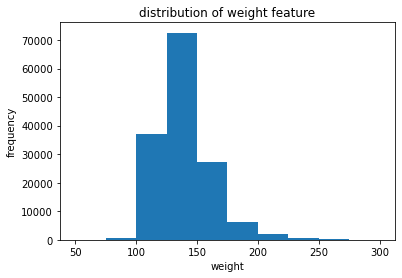

In [10]:
weight = [int(s[:-3]) for s in dataset['weight'].tolist()]

plt.hist(weight)
plt.title("distribution of weight feature")
plt.xlabel("weight")
plt.ylabel("frequency")

np.mean(weight),np.std(weight)
plt.savefig("./plots/3.png")

(783.0, 2205.0, 8341.0, 40761.0, 94291.0)

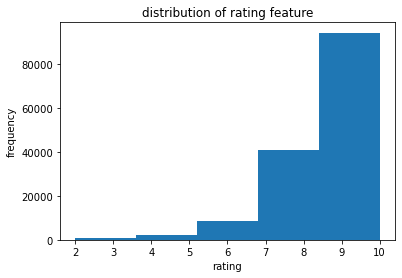

In [11]:
rating_cat = dataset["rating"].tolist()

ph = plt.hist(rating_cat,bins = 5)
plt.title("distribution of rating feature")
plt.xlabel("rating")
plt.ylabel("frequency")
plt.savefig("./plots/4.png")
# ph = plt.hist(rating_cat,bins = 5)
ph[0][0],ph[0][1],ph[0][2],ph[0][3],ph[0][4]

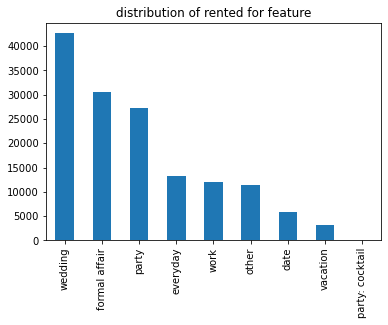

In [12]:
dataset['rented for'].value_counts().plot(kind='bar',title='distribution of rented for feature')
plt.savefig("./plots/5.png")

In [13]:
dataset['rented for'].value_counts()

wedding            42622
formal affair      30496
party              27198
everyday           13263
work               12124
other              11510
date                5929
vacation            3238
party: cocktail        1
Name: rented for, dtype: int64

(307.72631010855235, 223.6050447706942)

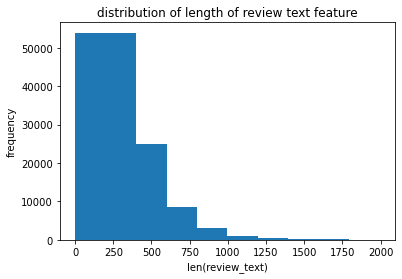

In [14]:
review_len = [len(review) for review in dataset['review_text'].tolist()]

plt.hist(review_len)
plt.title("distribution of length of review text feature")
plt.xlabel("len(review_text)")
plt.ylabel("frequency")
plt.savefig("./plots/6.png")
np.mean(review_len),np.std(review_len)

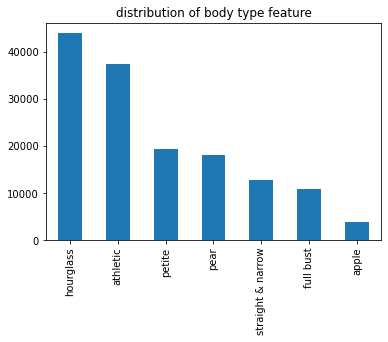

In [15]:
dataset['body type'].value_counts().plot(kind='bar',title='distribution of body type feature')
plt.savefig("./plots/15.png")

In [16]:
dataset['body type'].value_counts()

hourglass            43982
athletic             37518
petite               19358
pear                 18051
straight & narrow    12866
full bust            10797
apple                 3809
Name: body type, dtype: int64

(39.039827573250626, 25.705161789041547)

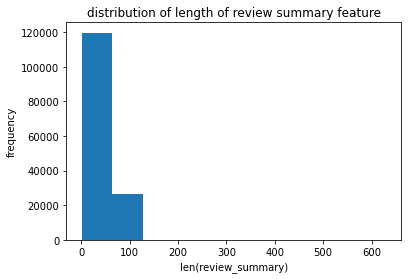

In [17]:
summary_len = [len(review) for review in dataset['review_summary'].tolist()]

plt.hist(summary_len)
plt.title("distribution of length of review summary feature")
plt.xlabel("len(review_summary)")
plt.ylabel("frequency")
plt.savefig("./plots/7.png")
np.mean(summary_len),np.std(summary_len)

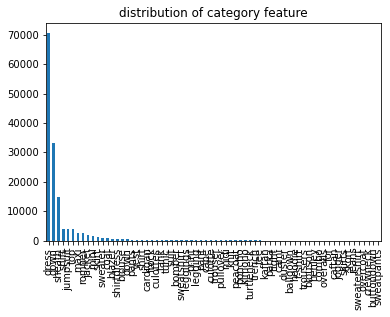

In [18]:
dataset['category'].value_counts().plot(kind='bar',title='distribution of category feature')
plt.savefig("./plots/8.png")

In [19]:
dataset['category'].value_counts()

dress           70474
gown            33278
sheath          14691
shift            4039
jumpsuit         4019
                ...  
sweatershirt        3
overcoat            1
crewneck            1
buttondown          1
sweatpants          1
Name: category, Length: 68, dtype: int64

In [20]:
from scipy.stats import norm

(65.26305326510955, 2.6592210287653657)

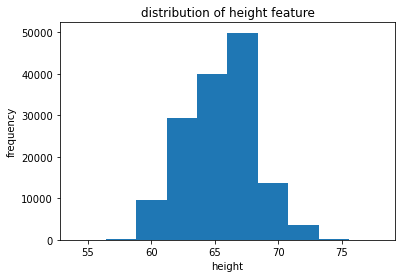

In [21]:
height = [int(x.split(' ')[0][:-1])*12 + int(x.split(' ')[1][:-1]) for x in dataset['height'].tolist()]

plt.figure()
plt.hist(height,bins=10)
plt.title("distribution of height feature")
plt.xlabel("height")
plt.ylabel("frequency")
# plt.plot(np.arange(10,80,5),norm.pdf(np.arange(10,80,5),np.mean(height),np.std(height))*400000)
plt.savefig("./plots/9.png")
np.mean(height),np.std(height)

(11.437918855589182, 7.826756769533253)

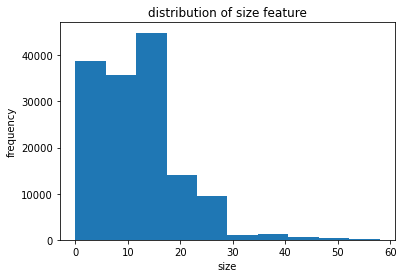

In [22]:
size = dataset['size'].tolist()

plt.hist(size)
plt.title("distribution of size feature")
plt.xlabel("size")
plt.ylabel("frequency")
plt.savefig("./plots/10.png")
np.mean(size),np.std(size)

(34.08979990572547, 8.113188865006668)

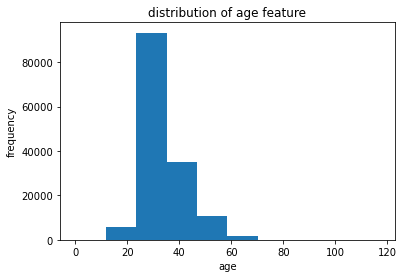

In [23]:
age = dataset['age'].tolist()

plt.hist(age)
plt.title("distribution of age feature")
plt.xlabel("age")
plt.ylabel("frequency")
plt.savefig("./plots/11.png")
np.mean(age),np.std(age)

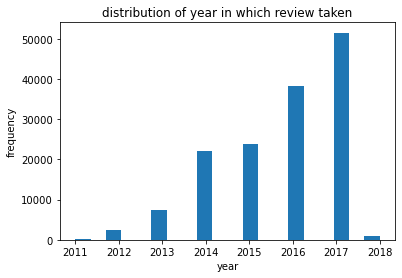

In [24]:
dataset['review_date'] = dataset['review_date'].astype('datetime64')
years = dataset['review_date'].dt.year
plt.hist(years,bins=20)
plt.title("distribution of year in which review taken")
plt.xlabel("year")
plt.ylabel("frequency")
plt.savefig("./plots/12.png") 



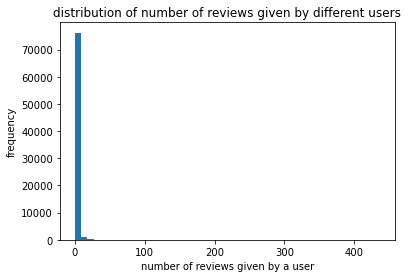

In [25]:
userCount = dataset['user_id'].value_counts()
plt.hist(userCount,bins=50)
plt.title("distribution of number of reviews given by different users")
plt.xlabel("number of reviews given by a user")
plt.ylabel("frequency")
plt.savefig("./plots/13.png")
 




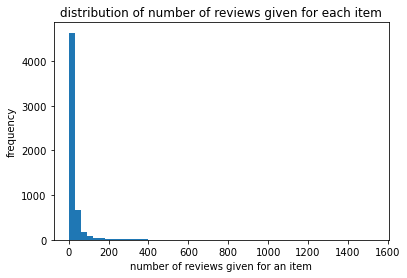

In [26]:
itemCount = dataset['item_id'].value_counts()
plt.hist(itemCount,bins=50)
plt.title("distribution of number of reviews given for each item")
plt.xlabel("number of reviews given for an item")
plt.ylabel("frequency")
plt.savefig("./plots/14.png")






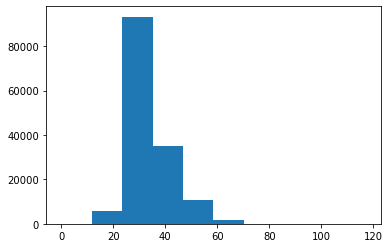

In [43]:
# dataset['age'].value_counts().plot(kind='bar',title='value counts of age label',bins=10)
plt.hist(dataset['age'])
plt.title("distribution of age of the users")
plt.xlabel("age of a user")
plt.ylabel("frequency")
plt.savefig("./plots/16.png")

In [38]:
dataset[dataset['age'] == set(dataset['age'].value_counts()==1)]

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [52]:
dataset['age'].value_counts()==1


31.0     False
30.0     False
32.0     False
29.0     False
33.0     False
         ...  
1.0       True
100.0     True
85.0      True
106.0     True
88.0      True
Name: age, Length: 83, dtype: bool

In [51]:
set(ones[ones == True].keys())

{1.0, 4.0, 5.0, 74.0, 81.0, 85.0, 88.0, 92.0, 97.0, 100.0, 106.0, 113.0}